In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## correr hasta salvar como html o pdf.
%%html
<style>
div.input {
    display:none;
}
</style>

In [3]:
df=pd.read_csv('http://allman.rhon.itam.mx/~ebarrios/EstApl2-2019/controles/control4/datosFit.csv')

In [284]:
df.head(5)

,carid,vehicle,year,msrp,accelrate,mpg,mpgmpge,carclass,carclass_id
0,148,ActiveHybrid 7L,2013,84300.00,18.18,25.00,25.00,L,2
1,42,ML450 Blue HV,2009,60519.83,12.60,23.99,23.99,SUV,6
2,36,Crown,2008,62290.38,8.70,37.16,37.16,M,3
3,38,F3DM,2008,23744.06,9.52,30.11,85.00,M,3
4,61,ActiveHybrid 7,2010,104300.43,20.41,22.11,22.11,L,2


<center><h1>Control 4: Precio de Vehículos Híbridos</h1></center>

<center>
    <h2>Friteam</h2>
    <br>150344<br>157043<br>158391
</center>

* Introducción
* Resumen del artículo
* Análisis exploratorio
* Modelos
* Comentarios sobre pronóstico
* Conclusiones

## Sección 1
### Introducción

Los vehículos híbridos representan un misterio en el mercado a lo largo de los años, existen ciertos tabúes o hasta prejuicios de su desempeño al igual que el que existe alrededor de los autos eléctricos. Este artículo busca explorar como es que el precio de un auto híbrido puede estar influenciado por otras variables interesantes, como puede ser la tasa de aceleración o las millas por galón.

## Rotter y emiliano cambien o pongan lo que quieran

## Sección 2 
### Resumen del artículo

## emiliano rifate este pex

## Sección 3
### Análisis Exploratorio

## Rotter echate los boxens y las normales y lo que creas que falte o comentar.

Nuestros datos:

In [24]:
df.head(5)

,carid,vehicle,year,msrp,accelrate,mpg,mpgmpge,carclass,carclass_id
0,148,ActiveHybrid 7L,2013,84300.00,18.18,25.00,25.00,L,2
1,42,ML450 Blue HV,2009,60519.83,12.60,23.99,23.99,SUV,6
2,36,Crown,2008,62290.38,8.70,37.16,37.16,M,3
3,38,F3DM,2008,23744.06,9.52,30.11,85.00,M,3
4,61,ActiveHybrid 7,2010,104300.43,20.41,22.11,22.11,L,2


/Users/jeroaranda/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


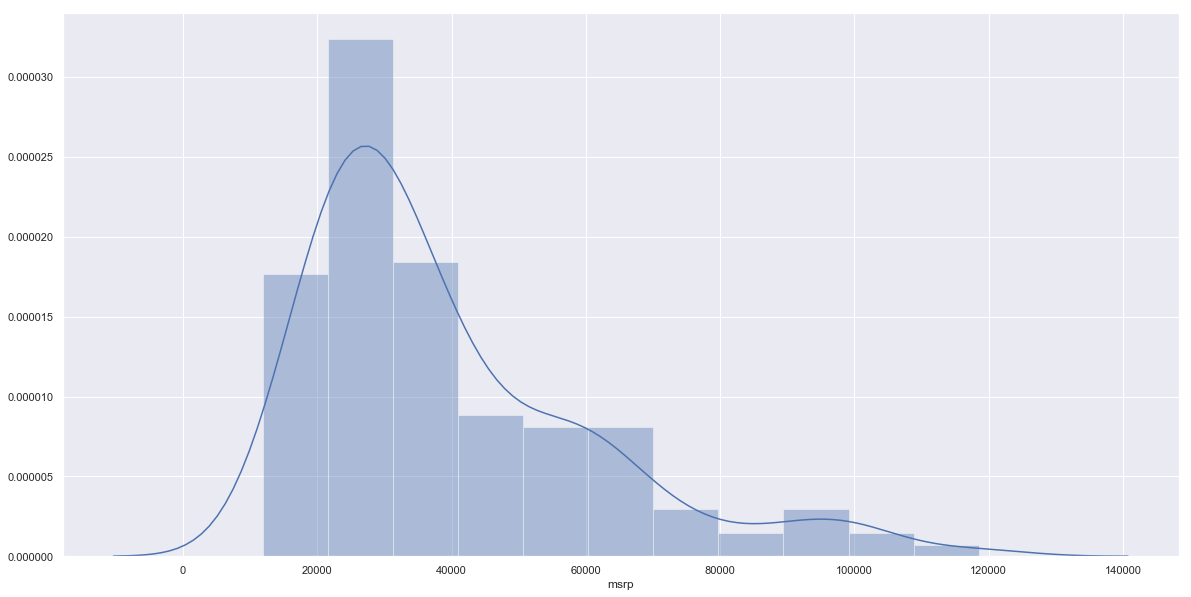

In [293]:
sns.distplot(df.msrp)

Precio contra algunas variables

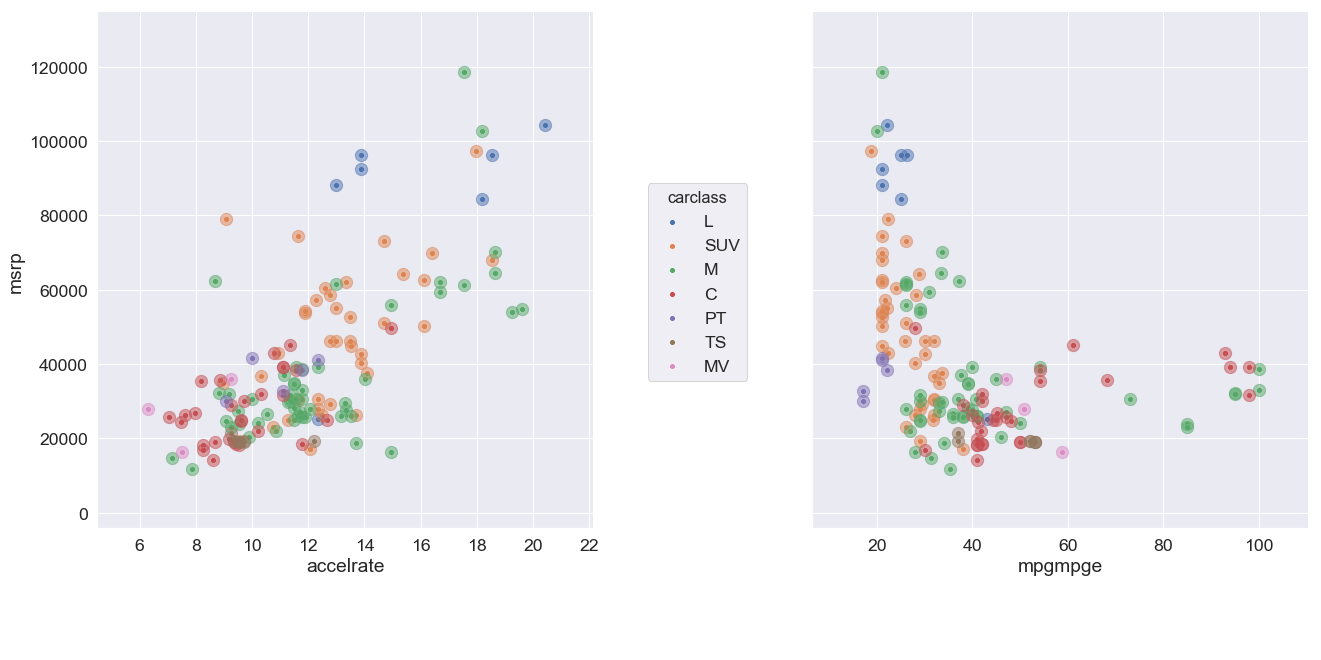

In [575]:
sns.set()
sns.set(font_scale=1.6)
g=sns.pairplot(data=df.drop(labels=['carclass_id','carid'],axis=1),hue='carclass',y_vars=['msrp'],x_vars=['accelrate','mpgmpge'])
g.map(plt.scatter, s=150,alpha=.5)
g._legend.set_bbox_to_anchor((.35, 0.35))
g._legend.set_frame_on(True)
g.fig.set_figheight(15)
g.fig.set_figwidth(30)

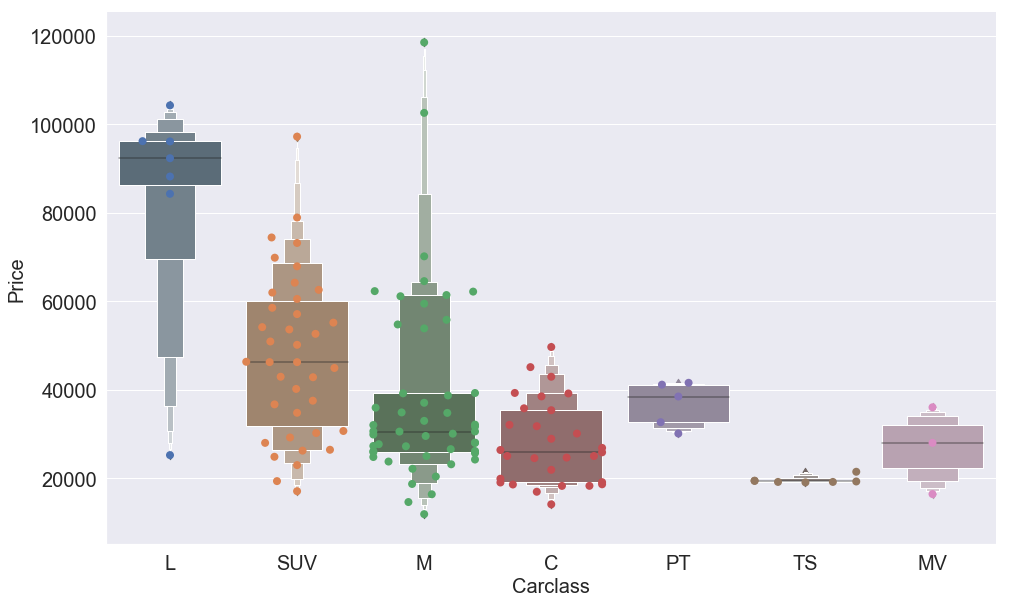

In [568]:
g=sns.catplot(x='carclass',y='msrp',hue='carclass', kind="swarm", data=df,s=8)
g.fig.set_figheight(10)
g.fig.set_figwidth(20)
#ax=sns.scatterplot(x='carclass',y='msrp',hue='carclass',size='mpg',data=df,alpha=.5,legend=False,zorder=10,x_jitter=2,sizes=(200, 800))
b=sns.boxenplot(x='carclass',y='msrp',data=df,palette='tab10',saturation=.2)
b.set_ylabel('Price',fontsize=20)
b.set_xlabel('Carclass',fontsize=20)
b.tick_params(labelsize=20)

Algunos visualizaciones con temporalidad.

/Users/jeroaranda/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


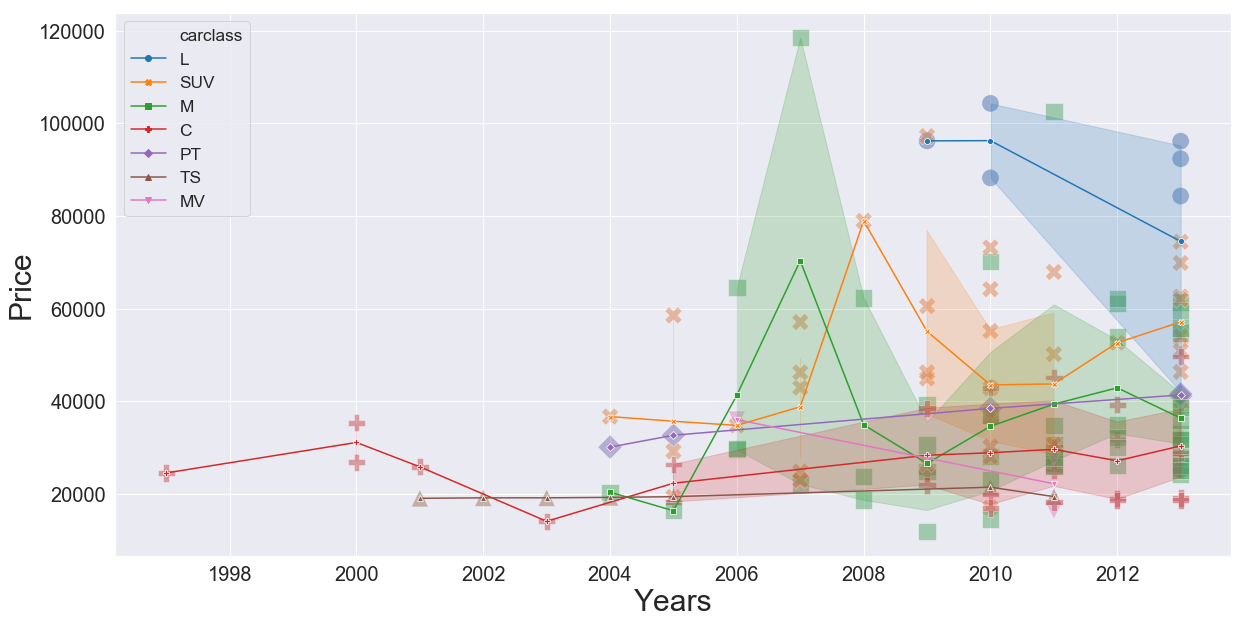

In [373]:
sns.set()
plt.rcParams['figure.figsize'] = (20, 10)
ax=sns.scatterplot(x='year',y='msrp',hue='carclass',data=df,style='carclass',s=300,alpha=.5,legend=False)
ax = sns.lineplot(x="year", y="msrp", hue='carclass' ,style="carclass", markers=True, dashes=False,
                  data=df.dropna(),palette='tab10')
ax.legend(fontsize='x-large')
ax.set_ylabel('Price',fontsize=30)
ax.set_xlabel('Years',fontsize=30)
ax.tick_params(labelsize=20)

/Users/jeroaranda/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


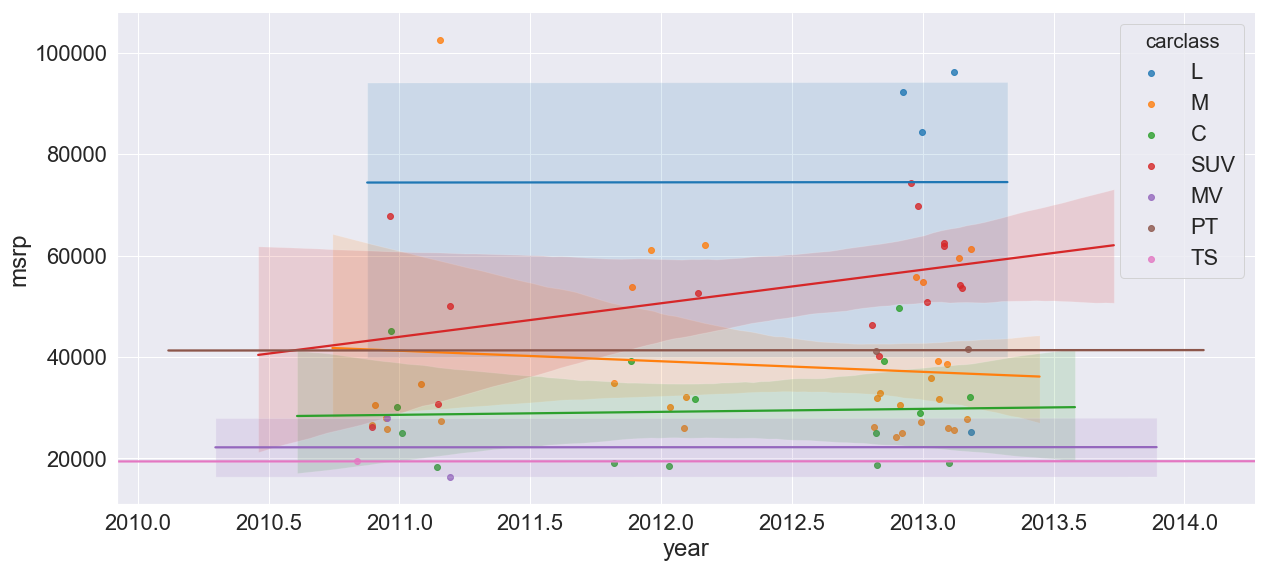

In [529]:
sns.set(font_scale=2)
g=sns.lmplot(x='year',y='msrp',data=df.loc[df.year>2010],hue='carclass',x_jitter=.2,palette='tab10',legend_out=False)
g.fig.set_figheight(10)
g.fig.set_figwidth(30)

## Sección 4
### Modelos

## Rotter algunos modelos que probamos y cual fue el mejor.

## Sección 5
### Comentario sobre pronósticos

## Dale emiliano la incorporación de la variable temporal y posibles cambios en el modelo.

## Sección 6
### Conclusiones

## Llenenle conclusiones
El ejercicio de pronosticar es un ejercicio interesante pues en el intentamos incorporar la mejor información posible para así lograr hacer una estimación de observaciones que aun no han sido realizadas. Lograr buenos modelos de este tipo es bastante complicado pero permite evaluar decisiones importantes. Es crucial el entendimiento de los regresores que tenemos en nuestra muestra pues estos son los responsables de informar a nuestro modelo de la mejor forma y su tratamiento puede hacer la diferencia. Este proyecto fue un buen ejercicio de recopilar lo aprendido durante el semestre antero.

#### Apéndice

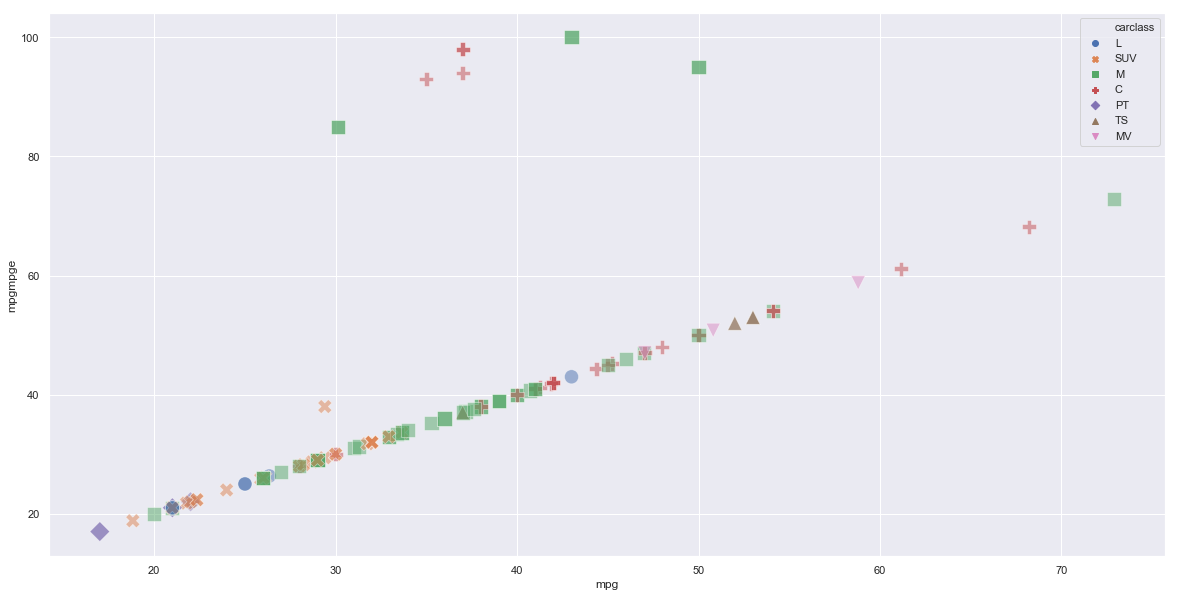

In [165]:
sns.scatterplot(x='mpg',y='mpgmpge',data=df,hue='carclass',style='carclass',s=200,alpha=.5)